In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.1f}'.format

# README

In order to run the solution, follow these steps:
- Adjust the first line in the **Makefile** to use your compiler. It should support C++20. The hard coded flags work with clang and gcc, msvc might require some changes.
- Build all executables by issuing **make all**
- Run the built executables via **./sanity_check**, **./speed** and **./bonus** to generate the data
- Run all cells in this notebook to analyse the data
- To clean build artifacts, issue **make clean**

For questions, contact engelerp@phys.ethz.ch

# Task 1: Potts Probability
The bond occupation probability for the Potts model is

\begin{equation}
p = 1 - e^{-\beta J},
\end{equation}

because the spacing between the two states ($\{0,\,1\}$ vs $\{-1,\,1\}$) is different.

# Task 2: Sanity Check
We verify the implementation of the Wolff and Swendsen Wang algorithms by making it produce quantities with known ground truth. As additional comparison, we generate the same data using the M(RT)^2 algorithm, which we believe to be correctly implemented. The analysis is done for an 8x8x8 system.

Additionally, Binder Cumulants are produced using the Wolff algorithm.

The used data is produced by the **sanity_check** executable.

In [27]:
#load data
sanity_check_wolff_df = pd.read_csv("sanity_check_wolff.csv")
sanity_check_sw_df = pd.read_csv("sanity_check_sw.csv")
sanity_check_mrt_df = pd.read_csv("sanity_check_mrt.csv")
#and load binder cumulate wolff data
sanity_check_wolff_4_df = pd.read_csv("sanity_check_wolff_bc_4.csv")
sanity_check_wolff_16_df = pd.read_csv("sanity_check_wolff_bc_16.csv")

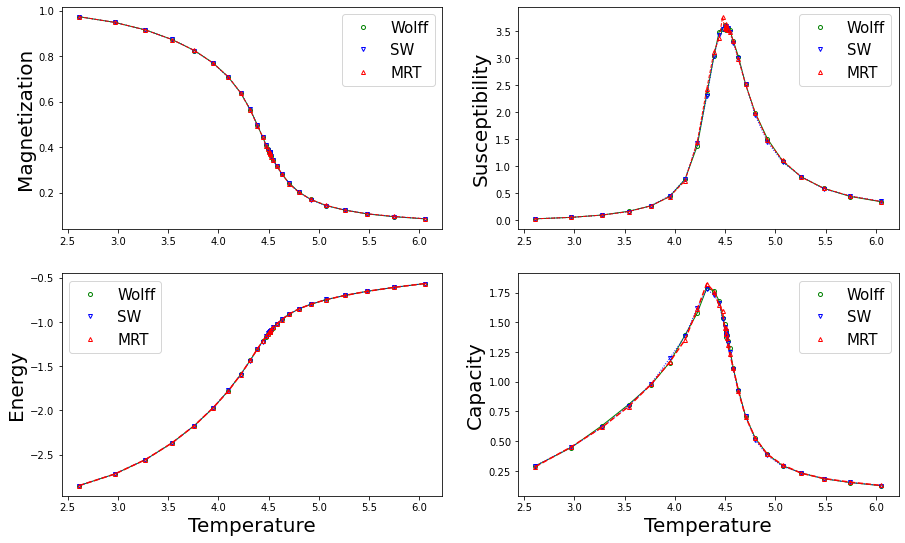

In [28]:
fig,axs = plt.subplots(2,2, figsize=(15,9))
#Magnetization
axs[0][0].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Magnetization'].values, ls='-', c='g', lw=1)
axs[0][0].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Magnetization'].values, 'o', ms=4, fillstyle='none', c='g', label=f"Wolff")
axs[0][0].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Magnetization'].values, ls=':', c='b', lw=1)
axs[0][0].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Magnetization'].values, 'v', ms=4, fillstyle='none', c='b', label=f"SW")
axs[0][0].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Magnetization'].values, ls='--', c='r', lw=1)
axs[0][0].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Magnetization'].values, '^', ms=4, fillstyle='none', c='r', label=f"MRT")
axs[0][0].legend(prop={'size': 15})
#axs[0][0].set_xlabel("Temperature", size=20)
axs[0][0].set_ylabel("Magnetization", size=20)
#Energy
axs[1][0].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Energy'].values, ls='-', c='g', lw=1)
axs[1][0].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Energy'].values, 'o', ms=4, fillstyle='none', c='g', label=f"Wolff")
axs[1][0].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Energy'].values, ls=':', c='b', lw=1)
axs[1][0].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Energy'].values, 'v', ms=4, fillstyle='none', c='b', label=f"SW")
axs[1][0].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Energy'].values, ls='--', c='r')
axs[1][0].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Energy'].values, '^', ms=4, fillstyle='none', c='r', lw=1, label=f"MRT")
axs[1][0].legend(prop={'size': 15})
axs[1][0].set_xlabel("Temperature", size=20)
axs[1][0].set_ylabel("Energy", size=20)
#Susceptibility
axs[0][1].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Susceptibility'].values, ls='-', c='g', lw=1)
axs[0][1].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Susceptibility'].values, 'o', ms=4, fillstyle='none', c='g', label=f"Wolff")
axs[0][1].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Susceptibility'].values, ls=':', c='b', lw=1)
axs[0][1].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Susceptibility'].values, 'v', ms=4, fillstyle='none', c='b', label=f"SW")
axs[0][1].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Susceptibility'].values, ls='--', c='r', lw=1)
axs[0][1].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Susceptibility'].values, '^', ms=4, fillstyle='none', c='r', label=f"MRT")
axs[0][1].legend(prop={'size': 15})
#axs[0][1].set_xlabel("Temperature", size=20)
axs[0][1].set_ylabel("Susceptibility", size=20)
#Heat Capacity
axs[1][1].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Capacity'].values, ls='-', c='g', lw=1)
axs[1][1].plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'Capacity'].values, 'o', ms=4, fillstyle='none', c='g', label=f"Wolff")
axs[1][1].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Capacity'].values, ls=':', c='b', lw=1)
axs[1][1].plot(sanity_check_sw_df.loc[:,'Temperature'].values, sanity_check_sw_df.loc[:,'Capacity'].values, 'v', ms=4, fillstyle='none', c='b', label=f"SW")
axs[1][1].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Capacity'].values, ls='--', c='r')
axs[1][1].plot(sanity_check_mrt_df.loc[:,'Temperature'].values, sanity_check_mrt_df.loc[:,'Capacity'].values, '^', ms=4, fillstyle='none', c='r', lw=1, label=f"MRT")
axs[1][1].legend(prop={'size': 15})
axs[1][1].set_xlabel("Temperature", size=20)
axs[1][1].set_ylabel("Capacity", size=20)
plt.show()

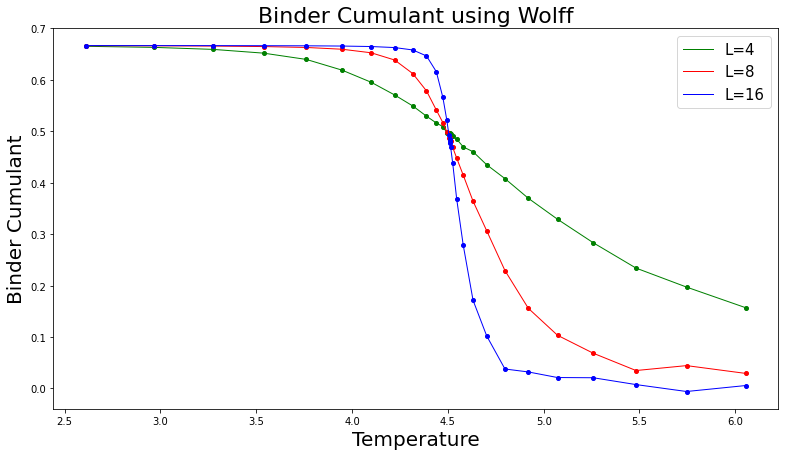

In [29]:
fig,ax = plt.subplots(1,1, figsize=(13,7))
ax.plot(sanity_check_wolff_4_df.loc[:,'Temperature'].values, sanity_check_wolff_4_df.loc[:,'BinderCumulant'].values, ls='-', c='g', lw=1, label=f"L=4")
ax.plot(sanity_check_wolff_4_df.loc[:,'Temperature'].values, sanity_check_wolff_4_df.loc[:,'BinderCumulant'].values, 'o', ms=4, c='g', lw=1)
ax.plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'BinderCumulant'].values, ls='-', c='r', lw=1, label=f"L=8")
ax.plot(sanity_check_wolff_df.loc[:,'Temperature'].values, sanity_check_wolff_df.loc[:,'BinderCumulant'].values, 'o', ms=4, c='r', lw=1)
ax.plot(sanity_check_wolff_16_df.loc[:,'Temperature'].values, sanity_check_wolff_16_df.loc[:,'BinderCumulant'].values, ls='-', c='b', lw=1, label=f"L=16")
ax.plot(sanity_check_wolff_16_df.loc[:,'Temperature'].values, sanity_check_wolff_16_df.loc[:,'BinderCumulant'].values, 'o', ms=4, c='b', lw=1)
ax.legend(prop={'size': 15})
ax.set_xlabel("Temperature", size=20)
ax.set_ylabel("Binder Cumulant", size=20)
ax.set_title("Binder Cumulant using Wolff", size=22)
plt.show()

# Task 4: Comparison

Next we want to compare the efficiency of the three implemented algorithms. The data for this section is produced by the **speed** executable.

In [5]:
#load data
A_corr_wolff_16_df = pd.read_csv("correlations_wolff_16.csv")
A_corr_sw_16_df = pd.read_csv("correlations_sw_16.csv")
A_corr_mrt_16_df = pd.read_csv("correlations_mrt_16.csv")

B_corr_wolff_32_df = pd.read_csv("tc_correlations_wolff_32.csv")
B_corr_wolff_16_df = pd.read_csv("tc_correlations_wolff_16.csv")
B_corr_wolff_8_df = pd.read_csv("tc_correlations_wolff_8.csv")
B_corr_wolff_4_df = pd.read_csv("tc_correlations_wolff_4.csv")
B_corr_wolff_2_df = pd.read_csv("tc_correlations_wolff_2.csv")

B_corr_sw_32_df = pd.read_csv("tc_correlations_sw_32.csv")
B_corr_sw_16_df = pd.read_csv("tc_correlations_sw_16.csv")
B_corr_sw_8_df = pd.read_csv("tc_correlations_sw_8.csv")
B_corr_sw_4_df = pd.read_csv("tc_correlations_sw_4.csv")
B_corr_sw_2_df = pd.read_csv("tc_correlations_sw_2.csv")

B_corr_mrt_32_df = pd.read_csv("tc_correlations_mrt_32.csv")
B_corr_mrt_16_df = pd.read_csv("tc_correlations_mrt_16.csv")
B_corr_mrt_8_df = pd.read_csv("tc_correlations_mrt_8.csv")
B_corr_mrt_4_df = pd.read_csv("tc_correlations_mrt_4.csv")
B_corr_mrt_2_df = pd.read_csv("tc_correlations_mrt_2.csv")

## Task 4.1: Correlation Times
First we calculate the correlation times. More precisely, we look at the temporal energy correlation, as spin-spin correlation (as calculated in exercise 2) requires some further thinking in the case of cluster algorithms, and the data might not directly be comparable to an MRT simulation.

There are various issues with the way the correlation times are calculated in exercise 2. Some examples include that the exponential behaviour of the correlation function $\Phi(t)$ is only valid "asymptotically", and that errors grow with increasing $t$. This means that it's hard to fit correctly, and a gigantic error on $\tau$ results, even when the fit parameters are optimized by hand. For fully automated procedures, which are a necessity for the use case at hand, errors are intolerably large.

Instead, we observe that

\begin{equation}\large
\int_0^\infty e^{-t/\tau}\,\text{d}t = \tau.
\end{equation}

Assuming that $\Phi(t)$ is exactly exponential, we can extract $\tau$ by summing the (discrete!) calculated values $\{\Phi[0],\, \Phi[1],\,\Phi[2],\dots\}$. As outlined above, the correlation function is not exactly exponential, and the exponential approximation is only good for short times. Thus we have to cut our sum at some point, and the result is merely approximative. In summary, we get

\begin{equation}\large
\tau \approx \frac{1}{2} + \sum_{n=1}^{N_\text{cut}} \Phi_n.
\end{equation}

Note that $\Phi_0 = 1$ by normalization, and the trapezoid rule tells us to halve it.

In order to reduce statistical errors, we observe that the correlation function should be invariant under temporal translations (it only depends on the difference of initial time and evaluation time). This is used below to get some averaging. While this reduces the maximum $t$ we can consider, we have just learnt that the correlation function turns wonky for long times anyway.

We should take a minute to think about the units of time in this context. If we want to compare correlation times between different methods, we should use the same units. A good choice is not given by "number of steps", because a typical MRT step will be much faster and do much less work than a cluster step. Instead, we choose to measure time in units of sweeps performed. One sweep has passed when $L^\text{dim}$ sites have been updated (we choose an MRT step to always count as 1 spin update). Note that the Monte Carlo Speeds will always be comparable, as long as "sweeps" and correlation time have compatible time units.

In [6]:
def integrated_tau(df,i):
    #load data
    mdirty = df.loc[:,f'Linear Energy {i}'].values
    e = mdirty[~np.isnan(mdirty)]
    corr = np.zeros(100)
    mu = np.mean(e)
    #calculate correlation function up to t=100 with averaging
    for i in range(len(e)-100):
        diff = e[i]-mu
        for j in range(100):
            corr[j] += diff * (e[i+j]-mu)
    #normalize
    norm = 1./corr[0]
    for i in range(len(corr)):
        corr[i] *= norm
    iat = 0.
    #calculate sum
    for i in range(1,len(corr)):
        if corr[i] < 0.:
            break
        #TODO: more stop criterions. for example, positive slope is a bad sign
        iat += corr[i]
    return 0.5+iat

In [7]:
print("Wolff autocorrelation times at T=Tc\nL: tau")
taus_wolff = {}
for df,size in [(B_corr_wolff_2_df,2),(B_corr_wolff_4_df,4),(B_corr_wolff_8_df,8),(B_corr_wolff_16_df,16),(B_corr_wolff_32_df,32)]:
    taus_wolff[size] = integrated_tau(df,0)
    print(f"{size}: tau = {taus_wolff[size]:.1f} sweeps")

print("SW autocorrelation times at T=Tc\nL: tau")
taus_sw = {}
for df,size in [(B_corr_sw_2_df,2),(B_corr_sw_4_df,4),(B_corr_sw_8_df,8),(B_corr_sw_16_df,16),(B_corr_sw_32_df,32)]:
    taus_sw[size] = integrated_tau(df,0)
    print(f"{size}: tau = {taus_sw[size]:.1f} sweeps")

print("\nMRT autocorrelation times at T=Tc\nL: tau")
taus_mrt = {}
for df,size in [(B_corr_mrt_2_df,2),(B_corr_mrt_4_df,4),(B_corr_mrt_8_df,8),(B_corr_mrt_16_df,16),(B_corr_mrt_32_df,32)]:
    taus_mrt[size] = integrated_tau(df,0)
    print(f"{size}: tau = {taus_mrt[size]:.1f} sweeps")

Wolff autocorrelation times at T=Tc
L: tau
2: tau = 0.9 sweeps
4: tau = 1.2 sweeps
8: tau = 1.5 sweeps
16: tau = 1.9 sweeps
32: tau = 2.5 sweeps
SW autocorrelation times at T=Tc
L: tau
2: tau = 1.1 sweeps
4: tau = 1.6 sweeps
8: tau = 3.4 sweeps
16: tau = 5.7 sweeps
32: tau = 6.1 sweeps

MRT autocorrelation times at T=Tc
L: tau
2: tau = 1.5 sweeps
4: tau = 4.7 sweeps
8: tau = 14.7 sweeps
16: tau = 36.6 sweeps
32: tau = 52.3 sweeps


## Task 4.2: Runtime and Monte Carlo Speed
Next we extract the performance of the implementations. We want to know how many sweeps we can perform per second. This facilitates the extraction of the Monte Carlo Speed, which, combining algorithmic efficiency and implementation performance, tells us how many (decorrelated) samples we can generate per second with a given implementation.

In [8]:
B_bench_wolff_2_df = pd.read_csv("tc_benchmark_wolff_2.csv")
B_bench_wolff_4_df = pd.read_csv("tc_benchmark_wolff_4.csv")
B_bench_wolff_8_df = pd.read_csv("tc_benchmark_wolff_8.csv")
B_bench_wolff_16_df = pd.read_csv("tc_benchmark_wolff_16.csv")
B_bench_wolff_32_df = pd.read_csv("tc_benchmark_wolff_32.csv")

B_bench_sw_2_df = pd.read_csv("tc_benchmark_sw_2.csv")
B_bench_sw_4_df = pd.read_csv("tc_benchmark_sw_4.csv")
B_bench_sw_8_df = pd.read_csv("tc_benchmark_sw_8.csv")
B_bench_sw_16_df = pd.read_csv("tc_benchmark_sw_16.csv")
B_bench_sw_32_df = pd.read_csv("tc_benchmark_sw_32.csv")

B_bench_mrt_2_df = pd.read_csv("tc_benchmark_mrt_2.csv")
B_bench_mrt_4_df = pd.read_csv("tc_benchmark_mrt_4.csv")
B_bench_mrt_8_df = pd.read_csv("tc_benchmark_mrt_8.csv")
B_bench_mrt_16_df = pd.read_csv("tc_benchmark_mrt_16.csv")
B_bench_mrt_32_df = pd.read_csv("tc_benchmark_mrt_32.csv")

In [30]:
print("Wolff sweeps per second at T=Tc\nL: sps")
sweeps_wolff_ps = {}
for df in [B_bench_wolff_2_df,B_bench_wolff_4_df,B_bench_wolff_8_df,B_bench_wolff_16_df,B_bench_wolff_32_df]:
    numsweeps = float(df.loc[:,'Number Sites Updated'].values[0]) / float(df.loc[:,'Linear System Size'].values[0])**3
    sweeps_per_second = numsweeps / (df.loc[:,'Runtime'].values[0]*0.001)
    print(f"{df.loc[:,'Linear System Size'].values[0]}: {sweeps_per_second:.0f} sweeps per second")
    sweeps_wolff_ps[df.loc[:,'Linear System Size'].values[0]] = sweeps_per_second

print("\nSW sweeps per second at T=Tc\nL: sps")
sweeps_sw_ps = {}
for df in [B_bench_sw_2_df,B_bench_sw_4_df,B_bench_sw_8_df,B_bench_sw_16_df,B_bench_sw_32_df]:
    numsweeps = float(df.loc[:,'Number Sites Updated'].values[0]) / float(df.loc[:,'Linear System Size'].values[0])**3
    sweeps_per_second = numsweeps / (df.loc[:,'Runtime'].values[0]*0.001)
    print(f"{df.loc[:,'Linear System Size'].values[0]}: {sweeps_per_second:.0f} sweeps per second")
    sweeps_sw_ps[df.loc[:,'Linear System Size'].values[0]] = sweeps_per_second

print("\nMRT sweeps per second at T=Tc\nL: sps")
sweeps_mrt_ps = {}
for df in [B_bench_mrt_2_df,B_bench_mrt_4_df,B_bench_mrt_8_df,B_bench_mrt_16_df,B_bench_mrt_32_df]:
    numsweeps = float(df.loc[:,'Number Sites Updated'].values[0]) / float(df.loc[:,'Linear System Size'].values[0])**3
    sweeps_per_second = numsweeps / (df.loc[:,'Runtime'].values[0]*0.001)
    print(f"{df.loc[:,'Linear System Size'].values[0]}: {sweeps_per_second:.0f} sweeps per second")
    sweeps_mrt_ps[df.loc[:,'Linear System Size'].values[0]] = sweeps_per_second

Wolff sweeps per second at T=Tc
L: sps
2: 2884640 sweeps per second
4: 271829 sweeps per second
8: 34350 sweeps per second
16: 4277 sweeps per second
32: 540 sweeps per second

SW sweeps per second at T=Tc
L: sps
2: 953610 sweeps per second
4: 122934 sweeps per second
8: 16153 sweeps per second
16: 2108 sweeps per second
32: 270 sweeps per second

MRT sweeps per second at T=Tc
L: sps
2: 3475843 sweeps per second
4: 427277 sweeps per second
8: 53362 sweeps per second
16: 6621 sweeps per second
32: 817 sweeps per second


In [10]:
mc_speed_wolff = {}
mc_speed_sw = {}
mc_speed_mrt = {}
for size in [2,4,8,16,32]:
    mc_speed_wolff[size] = sweeps_wolff_ps[size] / taus_wolff[size]
    mc_speed_sw[size] = sweeps_sw_ps[size] / taus_sw[size]
    mc_speed_mrt[size] = sweeps_mrt_ps[size] / taus_mrt[size]

In [12]:
columns = ['Sweeps / Second', 'Correlation Time', 'Monte Carlo Speed']
rows_mrt = ['MRT 2x2x2', 'MRT 4x4x4', 'MRT 8x8x8', 'MRT 16x16x16', 'MRT 32x32x32']
rows_wolff = ['Wolff 2x2x2', 'Wolff 4x4x4', 'Wolff 8x8x8', 'Wolff 16x16x16', 'Wolff 32x32x32']
rows_sw = ['SW 2x2x2', 'SW 4x4x4', 'SW 8x8x8', 'SW 16x16x16', 'SW 32x32x32']
data_mrt = [[sweeps_mrt_ps[2], taus_mrt[2], mc_speed_mrt[2]],
            [sweeps_mrt_ps[4], taus_mrt[4], mc_speed_mrt[4]],
            [sweeps_mrt_ps[8], taus_mrt[8], mc_speed_mrt[8]],
            [sweeps_mrt_ps[16], taus_mrt[16], mc_speed_mrt[16]],
            [sweeps_mrt_ps[32], taus_mrt[32], mc_speed_mrt[32]]]
data_wolff = [[sweeps_wolff_ps[2], taus_wolff[2], mc_speed_wolff[2]],
              [sweeps_wolff_ps[4], taus_wolff[4], mc_speed_wolff[4]],
              [sweeps_wolff_ps[8], taus_wolff[8], mc_speed_wolff[8]],
              [sweeps_wolff_ps[16], taus_wolff[16], mc_speed_wolff[16]],
              [sweeps_wolff_ps[32], taus_wolff[32], mc_speed_wolff[32]]]
data_sw = [[sweeps_sw_ps[2], taus_sw[2], mc_speed_sw[2]],
              [sweeps_sw_ps[4], taus_sw[4], mc_speed_sw[4]],
              [sweeps_sw_ps[8], taus_sw[8], mc_speed_sw[8]],
              [sweeps_sw_ps[16], taus_sw[16], mc_speed_sw[16]],
              [sweeps_sw_ps[32], taus_sw[32], mc_speed_sw[32]]]

#data frame table
mrt_table = pd.DataFrame(data=data_mrt, index=rows_mrt, columns=columns)
wolff_table = pd.DataFrame(data=data_wolff, index=rows_wolff, columns=columns)
sw_table = pd.DataFrame(data=data_sw, index=rows_sw, columns=columns)

## Task 4.3: Different Temperatures
We are also interested in how MRT and Wolff compare in the ordered and disordered phases. We carry out analyses similar to what was outlined above for temperatures $3.51, 5.51$, but here we restrict to the system size 16x16x16.

In [13]:
#load data
wolff_corr_df = pd.read_csv("correlations_wolff_16.csv")
wolff_bench_df = pd.read_csv("benchmark_wolff_16.csv")
sw_corr_df = pd.read_csv("correlations_sw_16.csv")
sw_bench_df = pd.read_csv("benchmark_sw_16.csv")
mrt_corr_df = pd.read_csv("correlations_mrt_16.csv")
mrt_bench_df = pd.read_csv("benchmark_mrt_16.csv")

In [14]:
#Wolff analysis
#taus
tau_wolff_351 = integrated_tau(wolff_corr_df,0)
tau_wolff_551 = integrated_tau(wolff_corr_df,2)
#sps
numsweeps = float(wolff_bench_df.loc[:,'Number Sites Updated'].values[0]) / float(wolff_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_wolff_351 = numsweeps / (wolff_bench_df.loc[:,'Runtime'].values[0]*0.001)
numsweeps = float(wolff_bench_df.loc[:,'Number Sites Updated'].values[2]) / float(wolff_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_wolff_551 = numsweeps / (wolff_bench_df.loc[:,'Runtime'].values[2]*0.001)
#MC speed
mcs_wolff_351 = sps_wolff_351 / tau_wolff_351
mcs_wolff_551 = sps_wolff_551 / tau_wolff_551

In [16]:
#SW analysis
#taus
tau_sw_351 = integrated_tau(sw_corr_df,0)
tau_sw_551 = integrated_tau(sw_corr_df,2)
#sps
numsweeps = float(sw_bench_df.loc[:,'Number Sites Updated'].values[0]) / float(sw_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_sw_351 = numsweeps / (sw_bench_df.loc[:,'Runtime'].values[0]*0.001)
numsweeps = float(sw_bench_df.loc[:,'Number Sites Updated'].values[2]) / float(sw_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_sw_551 = numsweeps / (sw_bench_df.loc[:,'Runtime'].values[2]*0.001)
#MC speed
mcs_sw_351 = sps_sw_351 / tau_sw_351
mcs_sw_551 = sps_sw_551 / tau_sw_551

In [17]:
#MRT analysis
#taus
tau_mrt_351 = integrated_tau(mrt_corr_df,0)
tau_mrt_551 = integrated_tau(mrt_corr_df,2)
#sps
numsweeps = float(mrt_bench_df.loc[:,'Number Sites Updated'].values[0]) / float(mrt_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_mrt_351 = numsweeps / (mrt_bench_df.loc[:,'Runtime'].values[0]*0.001)
numsweeps = float(mrt_bench_df.loc[:,'Number Sites Updated'].values[2]) / float(mrt_bench_df.loc[:,'Linear System Size'].values[0])**3
sps_mrt_551 = numsweeps / (mrt_bench_df.loc[:,'Runtime'].values[2]*0.001)
#MC speed
mcs_mrt_351 = sps_mrt_351 / tau_mrt_351
mcs_mrt_551 = sps_mrt_551 / tau_mrt_551

In [31]:
#table
rows_st = ['T=3.51', 'T=5.51']
columns_st = ['Wolff Sweeps/s', 'SW Sweeps/s', 'MRT Sweeps/s', 'Wolff Corr t', 'SW Corr t', 'MRT Corr t', 'Wolff MC spd', 'SW MC spd', 'MRT MC Spd']
data_st = [[sps_wolff_351, sps_sw_351, sps_mrt_351, tau_wolff_351, tau_sw_351, tau_mrt_351, mcs_wolff_351, mcs_sw_351, mcs_mrt_351],
          [sps_wolff_551, sps_sw_551, sps_mrt_551, tau_wolff_551, tau_sw_551, tau_mrt_551, mcs_wolff_551, mcs_sw_551, mcs_mrt_551]]

st_table = pd.DataFrame(data=data_st, index=rows_st, columns=columns_st)

## Task 4.4: Results

First, we compare MRT, Wolff and SW in a 16x16x16 system for temperatures different from Tc. Notable features are:
- Wolff takes more real time than MRT to perform a sweep in both phases
- The cluster algorithms reduce the correlation time in both phases
- Over all, Wolff is most efficient, as is seen by the slightly higher Monte Carlo Speeds in both phases
- SW is heavily handicapped due to the implementation being suboptimal

In [32]:
st_table

,Wolff Sweeps/s,SW Sweeps/s,MRT Sweeps/s,Wolff Corr t,SW Corr t,MRT Corr t,Wolff MC spd,SW MC spd,MRT MC Spd
T=3.51,3238.5,2017.0,6644.3,1.0,1.5,2.1,5144.4,1385.3,3181.0
T=5.51,4000.9,2268.2,6705.2,0.6,0.9,1.4,6739.2,2643.7,4892.5


Next, we look at the results for different system sizes at Tc. We note:
- Also at Tc, sweeps are performed fastest using MRT
- MRT suffers from an explosion in correlation time with growing system size, while Wolff sees a comparatively small increase. SW scales similarly to Wolff.
- For all implementations the time per sweep is proportional to the number of sites in the system. For Wolff and SW, this is the main driver of slowdown, while for MRT the correlation time also plays a significant role. 
- For all implementations, the Monte Carlo Speed for a 16x16x16 system is lower than for the other two temperatures (see above). But compared to MRT, Wolff (and SW to a smaller extent) have drastically reduced critical slowing down.

In [21]:
mrt_table

,Sweeps / Second,Correlation Time,Monte Carlo Speed
MRT 2x2x2,3475842.9,1.5,2303684.8
MRT 4x4x4,427277.4,4.7,91036.4
MRT 8x8x8,53362.4,14.7,3625.8
MRT 16x16x16,6620.7,36.6,180.8
MRT 32x32x32,817.4,52.3,15.6


In [22]:
wolff_table

,Sweeps / Second,Correlation Time,Monte Carlo Speed
Wolff 2x2x2,2884639.7,0.9,3337101.6
Wolff 4x4x4,271828.8,1.2,227690.6
Wolff 8x8x8,34350.3,1.5,22841.0
Wolff 16x16x16,4276.7,1.9,2200.0
Wolff 32x32x32,540.0,2.5,214.0


In [23]:
sw_table

,Sweeps / Second,Correlation Time,Monte Carlo Speed
SW 2x2x2,953610.3,1.1,857412.1
SW 4x4x4,122934.2,1.6,75899.5
SW 8x8x8,16153.2,3.4,4683.9
SW 16x16x16,2107.8,5.7,368.1
SW 32x32x32,270.5,6.1,44.4


# Bonus: Temperature Scan
As a bonus, we consider a 16x16x16 system and compare MRT, Wolff and SW along a temperature scan. The data for this part is generated using the **bonus** executable.

In [24]:
bonus_wolff_corr_df = pd.read_csv("bonus_correlations_wolff_16.csv")
bonus_wolff_bench_df = pd.read_csv("bonus_benchmark_wolff_16.csv")
bonus_sw_corr_df = pd.read_csv("bonus_correlations_sw_16.csv")
bonus_sw_bench_df = pd.read_csv("bonus_benchmark_sw_16.csv")
bonus_mrt_corr_df = pd.read_csv("bonus_correlations_mrt_16.csv")
bonus_mrt_bench_df = pd.read_csv("bonus_benchmark_mrt_16.csv")

## Data Extraction

In [25]:
max_i = int(bonus_wolff_corr_df.loc[:,'Number Of Temperatures'].values[0])

bonus_temperatures = []
bonus_wolff_taus = []
bonus_sw_taus = []
bonus_mrt_taus = []
bonus_wolff_sps = []
bonus_sw_sps = []
bonus_mrt_sps = []
bonus_wolff_mcs = []
bonus_sw_mcs = []
bonus_mrt_mcs = []
bonus_wolff_runtimes = []
bonus_sw_runtimes = []
bonus_mrt_runtimes = []
bonus_wolff_stps = []
bonus_sw_stps = []
bonus_mrt_stps = []
for i in range(max_i):
    #correlation time
    bonus_wolff_taus.append(integrated_tau(bonus_wolff_corr_df,i))
    bonus_sw_taus.append(integrated_tau(bonus_sw_corr_df,i))
    bonus_mrt_taus.append(integrated_tau(bonus_mrt_corr_df,i))
    #sweeps per second
    numsweeps = float(bonus_wolff_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_wolff_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_wolff_sps.append(numsweeps / (bonus_wolff_bench_df.loc[:,'Runtime'].values[i]*0.001))
    numsweeps = float(bonus_sw_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_sw_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_sw_sps.append(numsweeps / (bonus_sw_bench_df.loc[:,'Runtime'].values[i]*0.001))
    numsweeps = float(bonus_mrt_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_mrt_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_mrt_sps.append(numsweeps / (bonus_mrt_bench_df.loc[:,'Runtime'].values[i]*0.001))
    #monte carlo speed
    bonus_wolff_mcs.append(bonus_wolff_sps[-1] / bonus_wolff_taus[-1])
    bonus_sw_mcs.append(bonus_sw_sps[-1] / bonus_sw_taus[-1])
    bonus_mrt_mcs.append(bonus_mrt_sps[-1] / bonus_mrt_taus[-1])
    #runtime
    bonus_wolff_runtimes.append(bonus_wolff_bench_df.loc[:,'Runtime'].values[i]*0.001)
    bonus_sw_runtimes.append(bonus_sw_bench_df.loc[:,'Runtime'].values[i]*0.001)
    bonus_mrt_runtimes.append(bonus_mrt_bench_df.loc[:,'Runtime'].values[i]*0.001)
    #steps per sweep
    numsweeps = float(bonus_wolff_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_wolff_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_wolff_stps.append(bonus_wolff_bench_df.loc[:,'Number Updates Performed'].values[i] / numsweeps)
    numsweeps = float(bonus_sw_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_sw_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_sw_stps.append(bonus_sw_bench_df.loc[:,'Number Updates Performed'].values[i] / numsweeps)
    numsweeps = float(bonus_mrt_bench_df.loc[:,'Number Sites Updated'].values[i]) / float(bonus_mrt_bench_df.loc[:,'Linear System Size'].values[0])**3
    bonus_mrt_stps.append(bonus_mrt_bench_df.loc[:,'Number Updates Performed'].values[i] / numsweeps)
    #save temperature
    bonus_temperatures.append(bonus_wolff_bench_df.loc[:,'Temperature'].values[i])

## Visualization

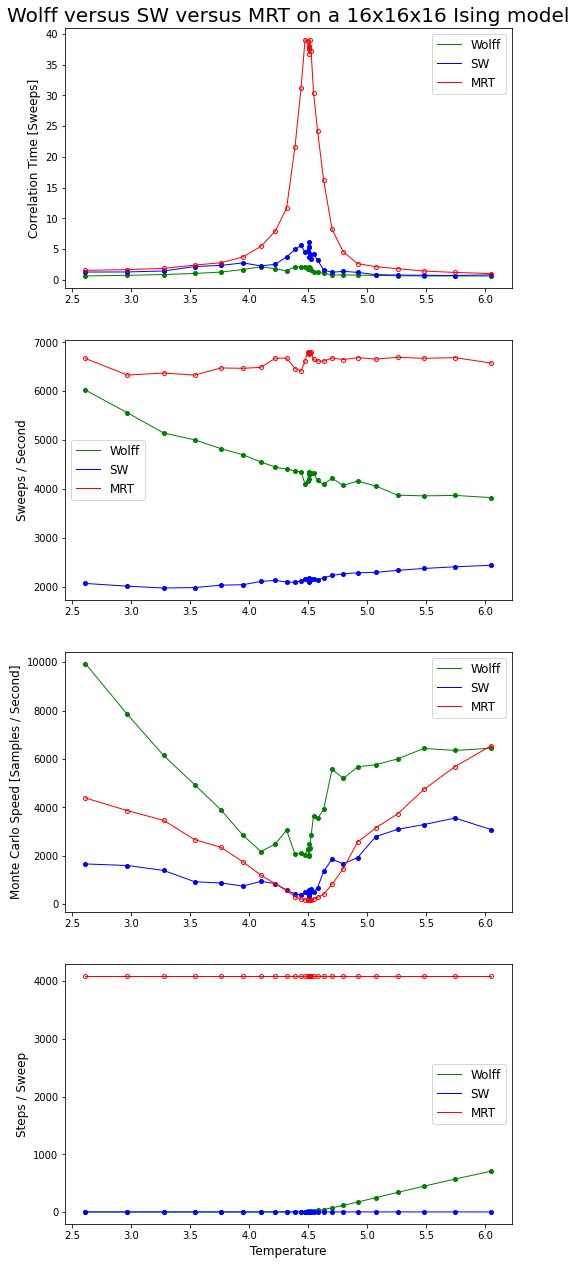

In [26]:
fig,axs = plt.subplots(4, figsize=(8,22))
axs[0].set_title("Wolff versus SW versus MRT on a 16x16x16 Ising model", size=20)
axs[0].plot(bonus_temperatures, bonus_wolff_taus, ls='-', c='g', lw=1, label=f"Wolff")
axs[0].plot(bonus_temperatures, bonus_wolff_taus, 'o', ms=4, c='g')
axs[0].plot(bonus_temperatures, bonus_sw_taus, ls='-', c='b', lw=1, label=f"SW")
axs[0].plot(bonus_temperatures, bonus_sw_taus, 'o', ms=4, c='b')
axs[0].plot(bonus_temperatures, bonus_mrt_taus, ls='-', c='r', lw=1, label=f"MRT")
axs[0].plot(bonus_temperatures, bonus_mrt_taus, 'o', ms=4, fillstyle='none', c='r')
axs[0].legend(prop={'size': 12})
axs[0].set_ylabel("Correlation Time [Sweeps]", size=12)
axs[1].plot(bonus_temperatures, bonus_wolff_sps, ls='-', c='g', lw=1, label=f"Wolff")
axs[1].plot(bonus_temperatures, bonus_wolff_sps, 'o', ms=4, c='g')
axs[1].plot(bonus_temperatures, bonus_sw_sps, ls='-', c='b', lw=1, label=f"SW")
axs[1].plot(bonus_temperatures, bonus_sw_sps, 'o', ms=4, c='b')
axs[1].plot(bonus_temperatures, bonus_mrt_sps, ls='-', c='r', lw=1, label=f"MRT")
axs[1].plot(bonus_temperatures, bonus_mrt_sps, 'o', ms=4, fillstyle='none', c='r')
axs[1].legend(prop={'size': 12})
axs[1].set_ylabel("Sweeps / Second", size=12)
axs[2].plot(bonus_temperatures, bonus_wolff_mcs, ls='-', c='g', lw=1, label=f"Wolff")
axs[2].plot(bonus_temperatures, bonus_wolff_mcs, 'o', ms=4, c='g')
axs[2].plot(bonus_temperatures, bonus_sw_mcs, ls='-', c='b', lw=1, label=f"SW")
axs[2].plot(bonus_temperatures, bonus_sw_mcs, 'o', ms=4, c='b')
axs[2].plot(bonus_temperatures, bonus_mrt_mcs, ls='-', c='r', lw=1, label=f"MRT")
axs[2].plot(bonus_temperatures, bonus_mrt_mcs, 'o', ms=4, fillstyle='none', c='r')
axs[2].legend(prop={'size': 12})
axs[2].set_ylabel("Monte Carlo Speed [Samples / Second]", size=12)
axs[3].plot(bonus_temperatures, bonus_wolff_stps, ls='-', c='g', lw=1, label=f"Wolff")
axs[3].plot(bonus_temperatures, bonus_wolff_stps, 'o', ms=4, c='g')
axs[3].plot(bonus_temperatures, bonus_sw_stps, ls='-', c='b', lw=1, label=f"SW")
axs[3].plot(bonus_temperatures, bonus_sw_stps, 'o', ms=4, c='b')
axs[3].plot(bonus_temperatures, bonus_mrt_stps, ls='-', c='r', lw=1, label=f"MRT")
axs[3].plot(bonus_temperatures, bonus_mrt_stps, 'o', ms=4, fillstyle='none', c='r')
axs[3].legend(prop={'size': 12})
axs[3].set_ylabel("Steps / Sweep", size=12)
axs[3].set_xlabel("Temperature", size=12);


## Interpretation
We see that temperature doesn't affect the time per sweep in the MRT scheme. This is expected and implies that the Monte Carlo Speed for MRT mainly depends on the correlation time.

For Wolff, the case is different. While the correlation time is fairly flat as a function of temperature (critical slowing down is suppressed), the time per sweep increases with temperature. As an explanation, my best guess is that when we can only build small clusters, the overhead of bookkeeping and branching becomes a major contributor to runtime, while we lose the caching benefits over MRT. This effect could probably be alleviated in a more efficient implementation.

Combining the observed effects, we understand the Monte Carlo Speeds. While Wolff always sweeps more slowly, at low temperatures the correlation time is low enough to still make it faster than MRT. At high temperatures, overheads become larger and the correlation time improvement diminishes, such that MRT catches up.

Interpreting the Swendsen-Wang data is a little more difficult, because my current implementation is probably unnecessarily slow. What we can observe is that it always requires two steps for one sweep, and the correlation times are comparable to those of Wolff. Some part of the inefficiency is real, because it spends / wastes time building tiny clusters.